###### IMPORT REQUIRED LIBRARY

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### SET WORKING DIRECTORY & IMPORT DATASET

In [15]:
import os
os.chdir(r'C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\001_SUPERVISED_LEARNING\001_REGRESSION\002_POLYNOMIAL')
df = pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


###### CHECK NULL VALUES

In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
df.shape

(1599, 12)

###### CHECK OUTLIER THROUGH PLOTS

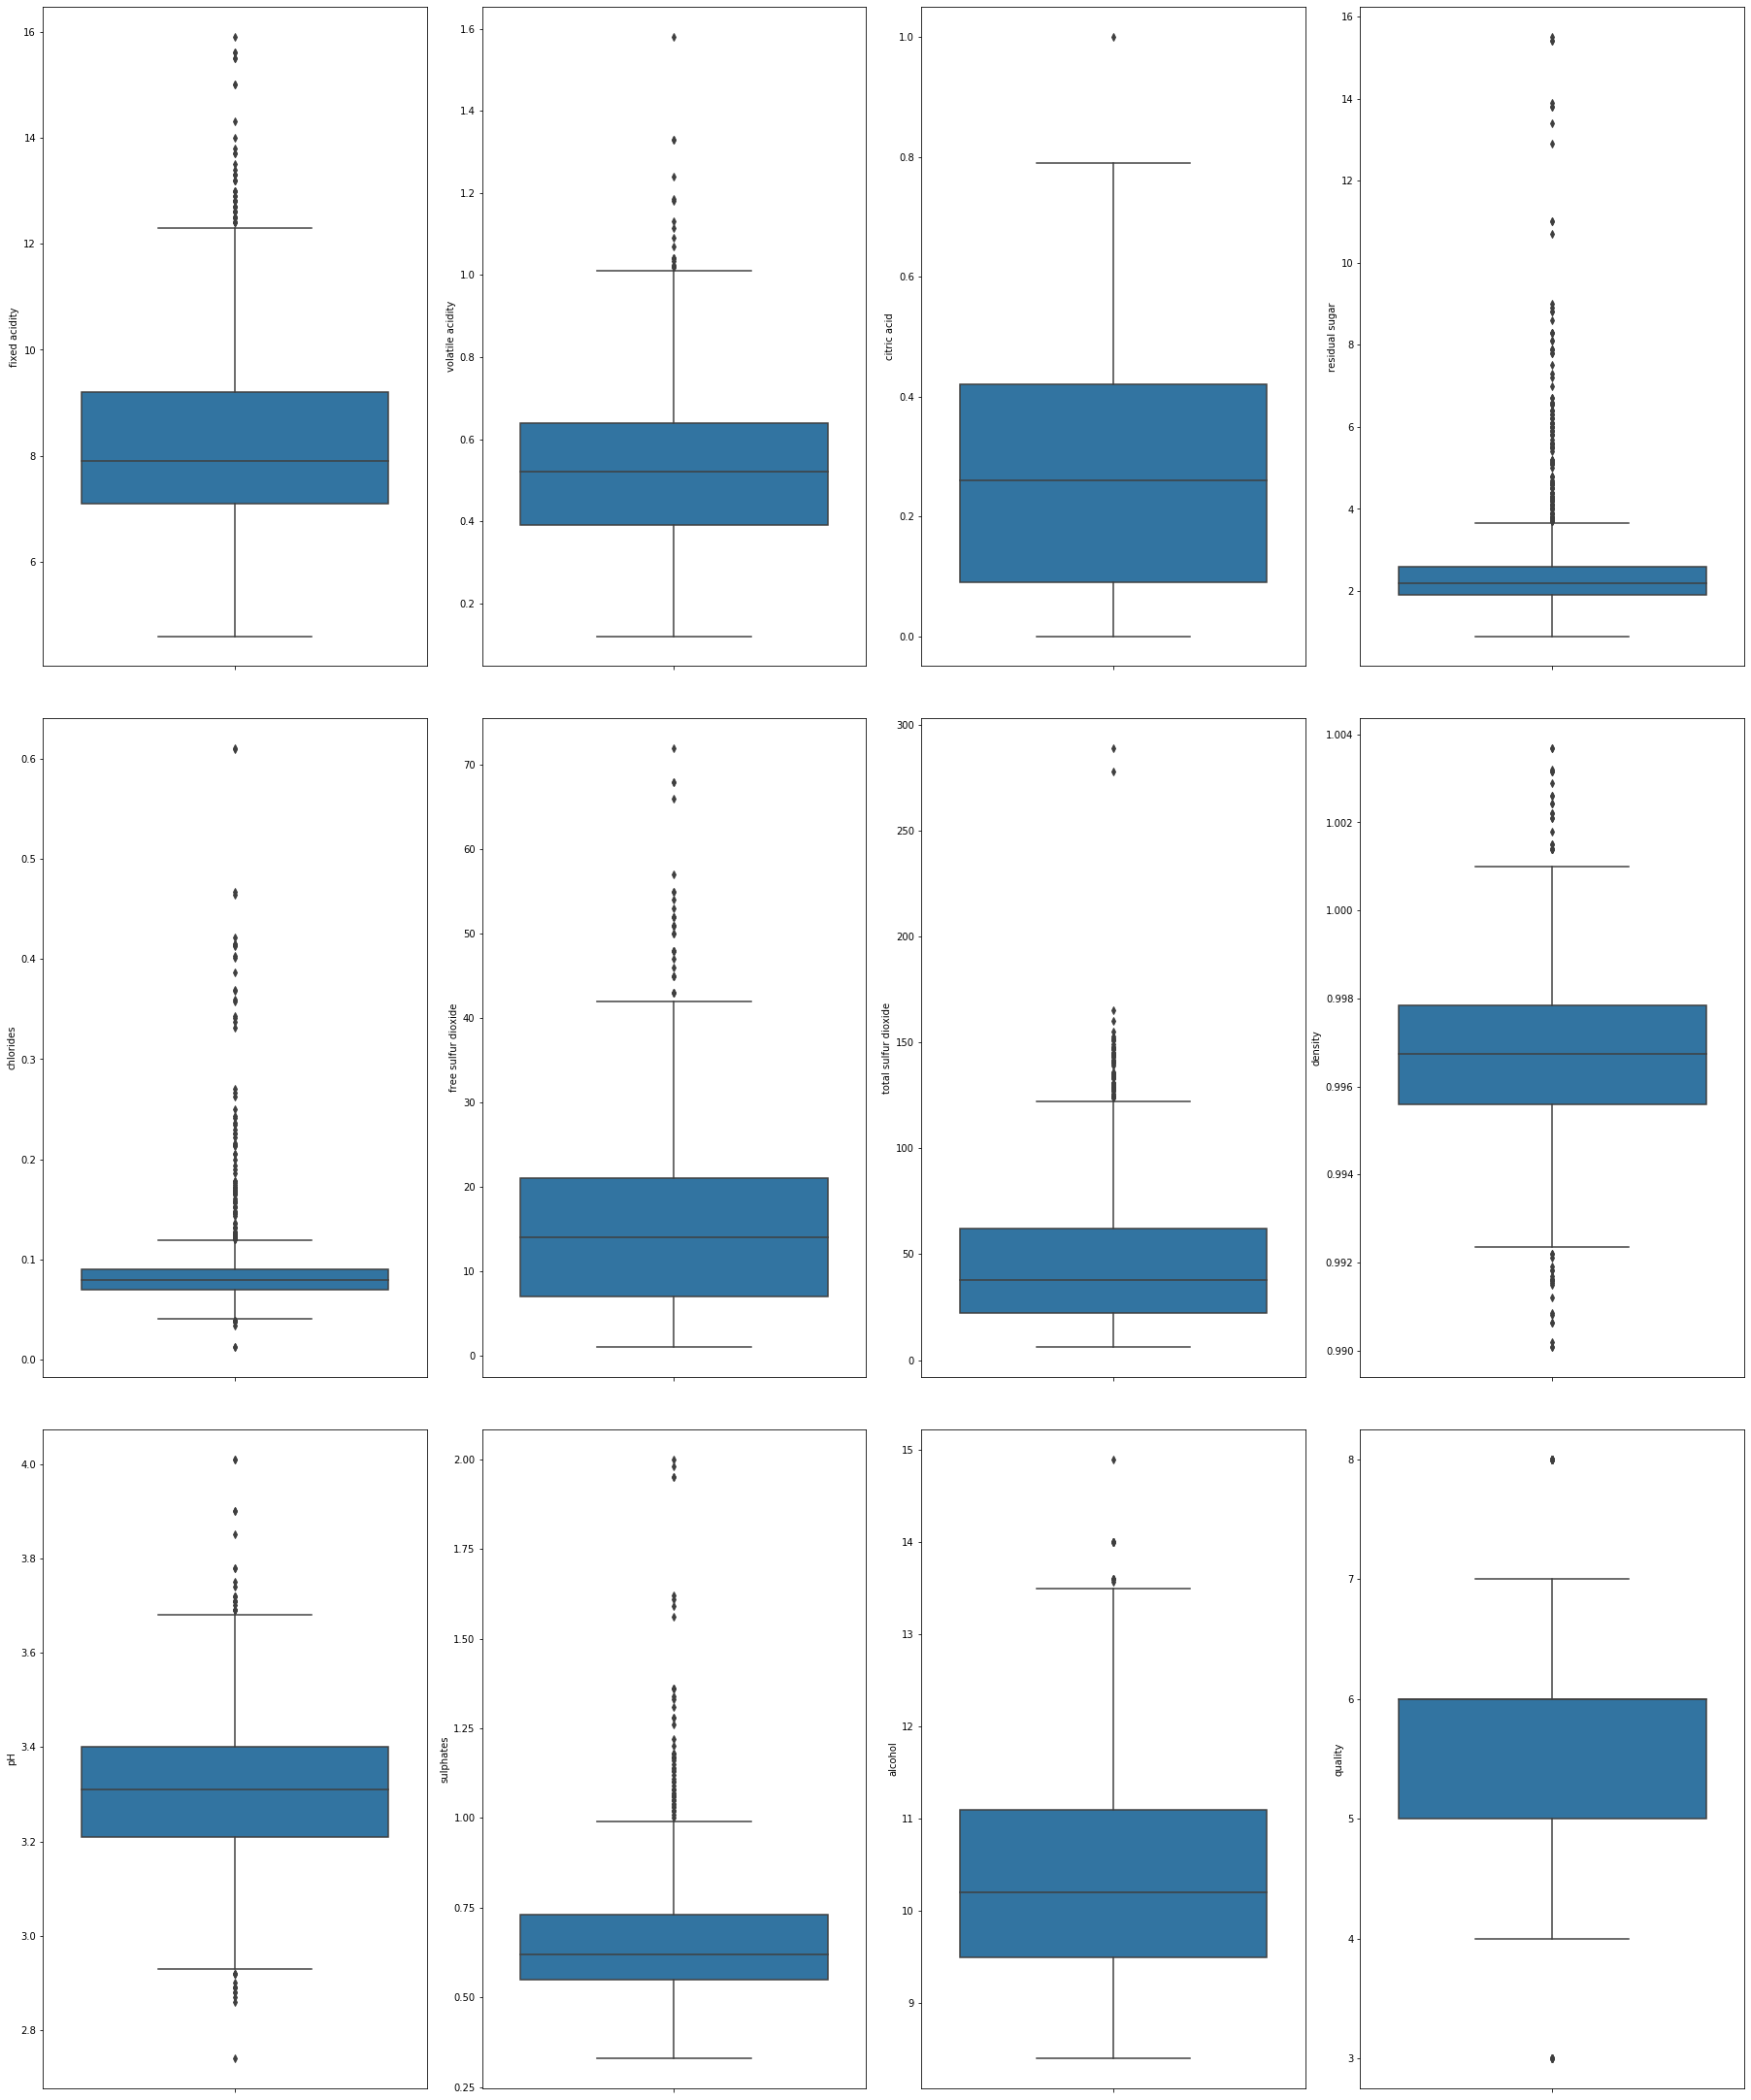

In [28]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize =(25,30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

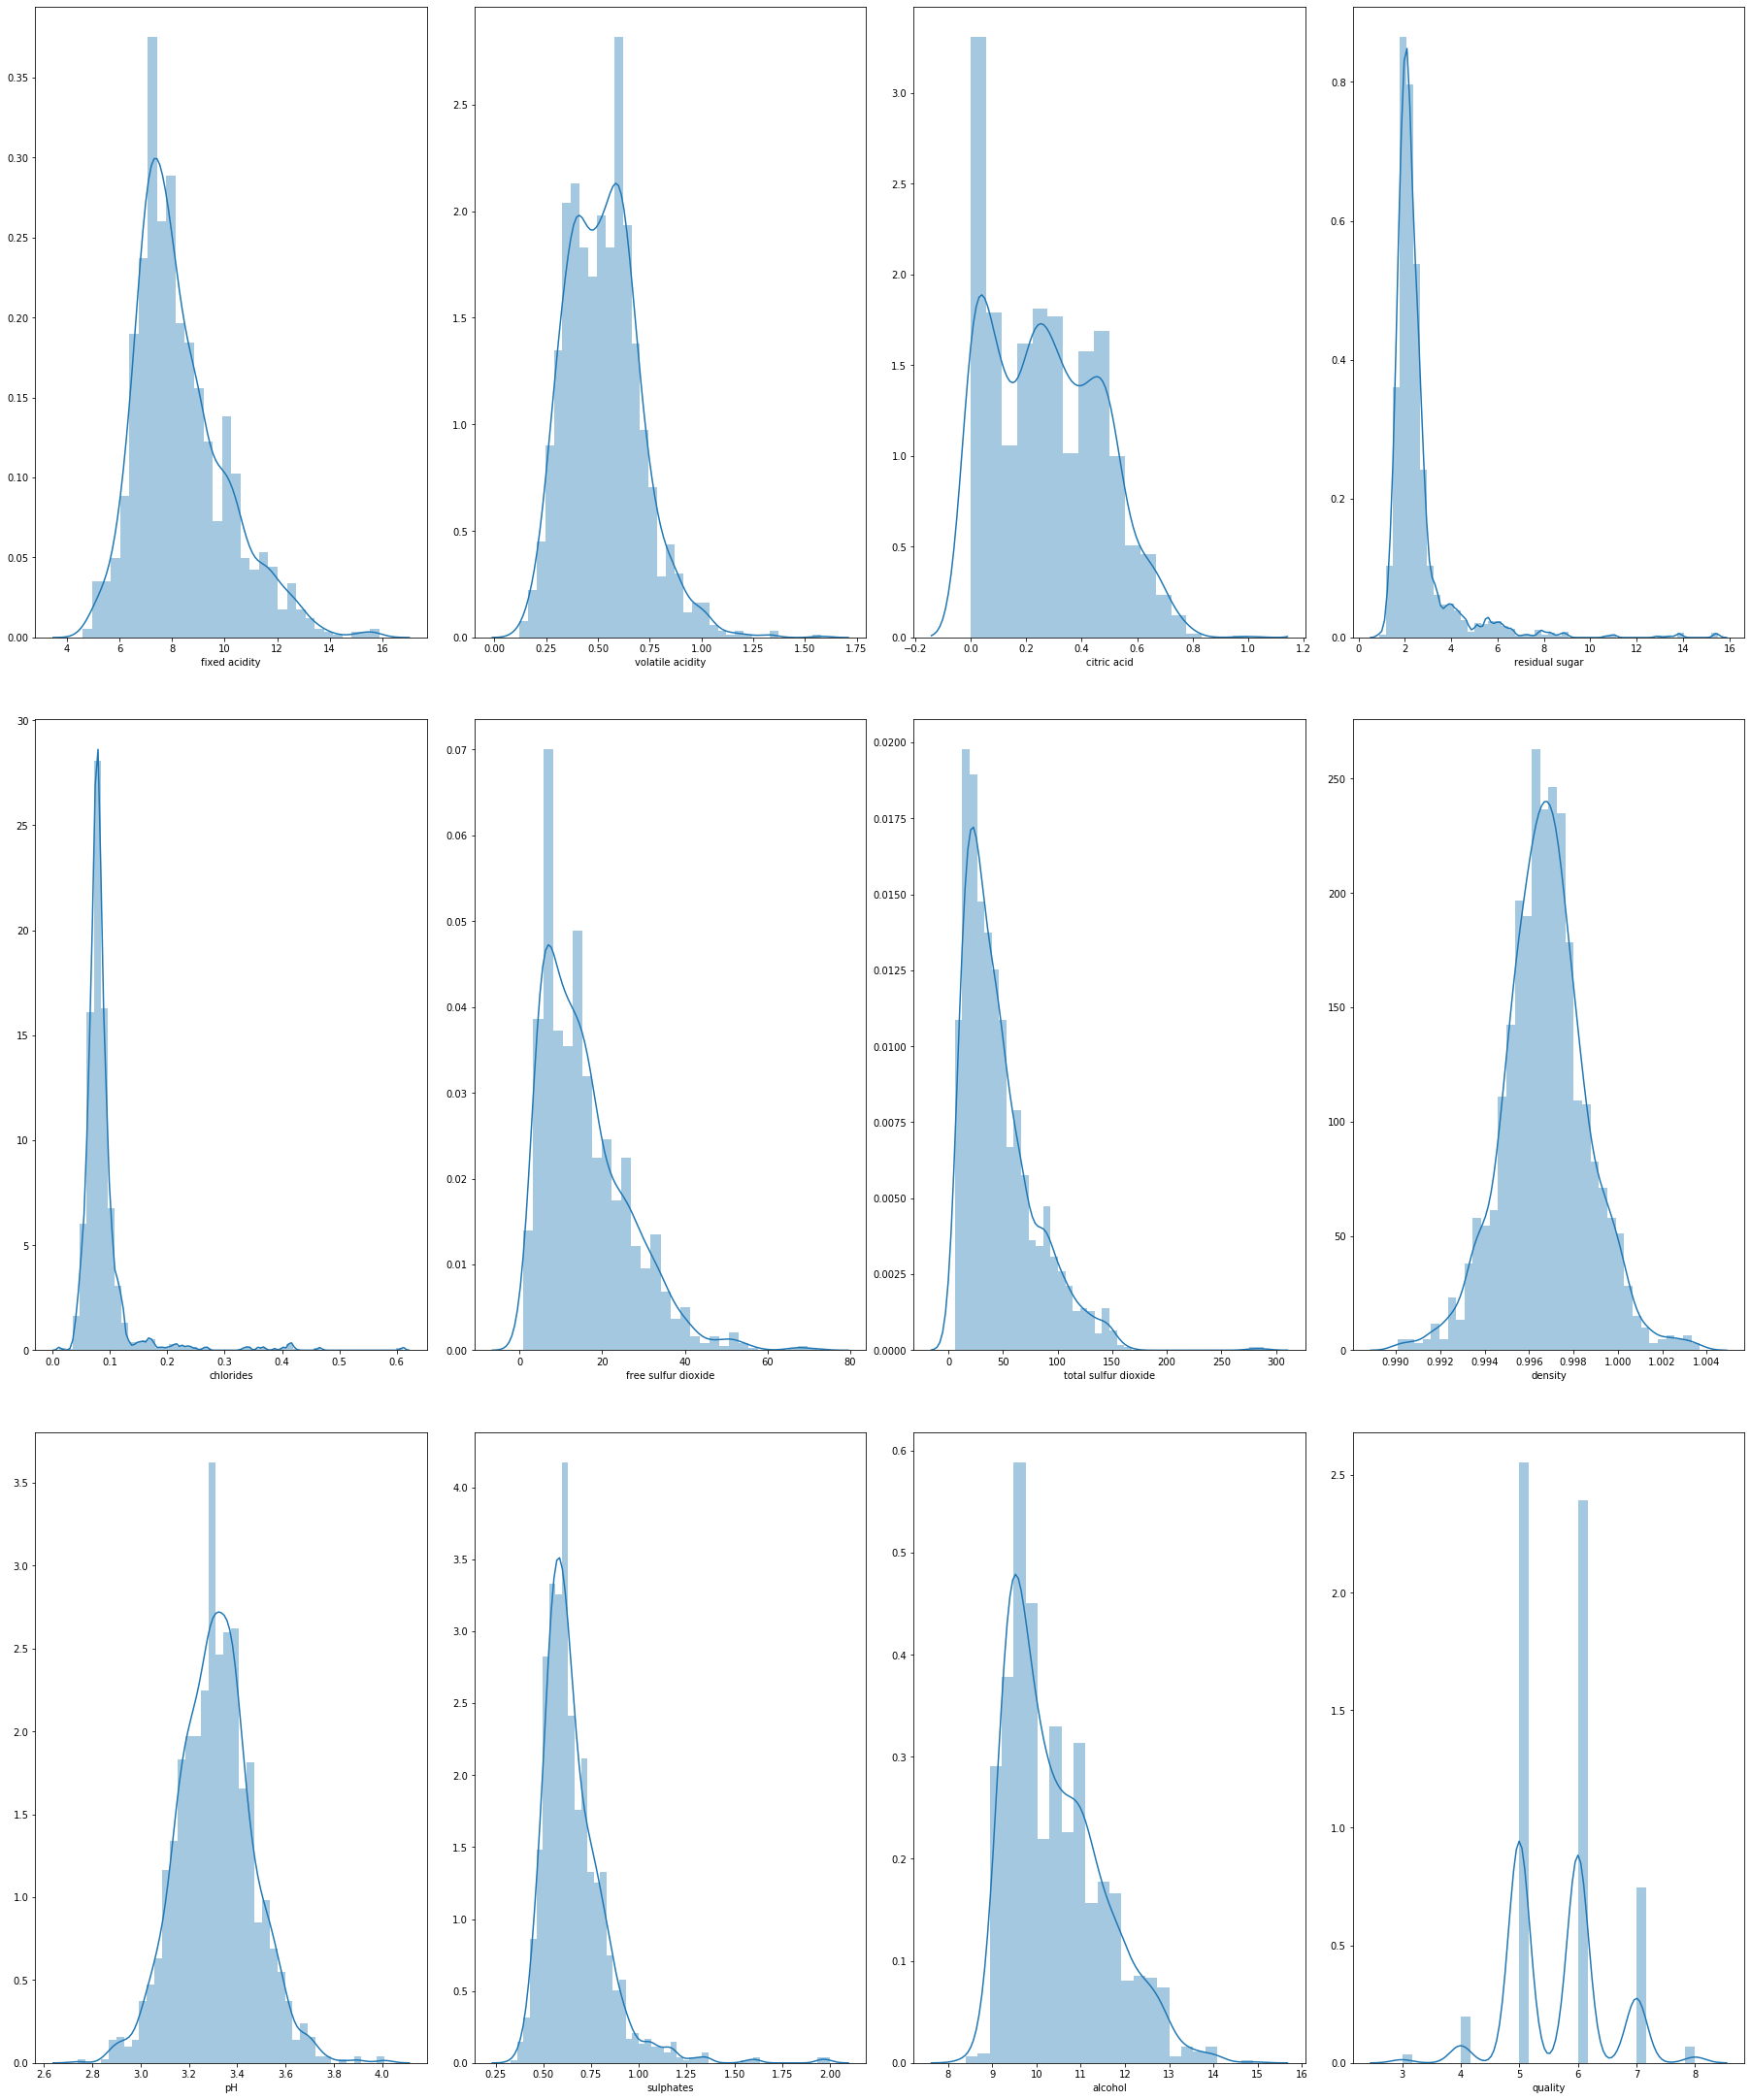

In [29]:
# CREATE DISTRIBUTION PLOT
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize =(25,30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

###### LOG TRANFORMATION

In [30]:
# LOG TRANFORMATION
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

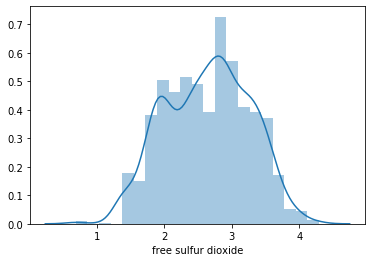

In [31]:
sns.distplot(df['free sulfur dioxide'])

###### USE COUNT PLOT TO CHECK CLASSES IN A COLUMN

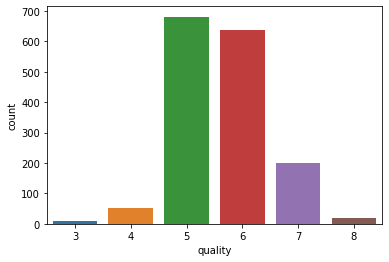

In [32]:
sns.countplot(df['quality'])

###### COORELATION MATRIX

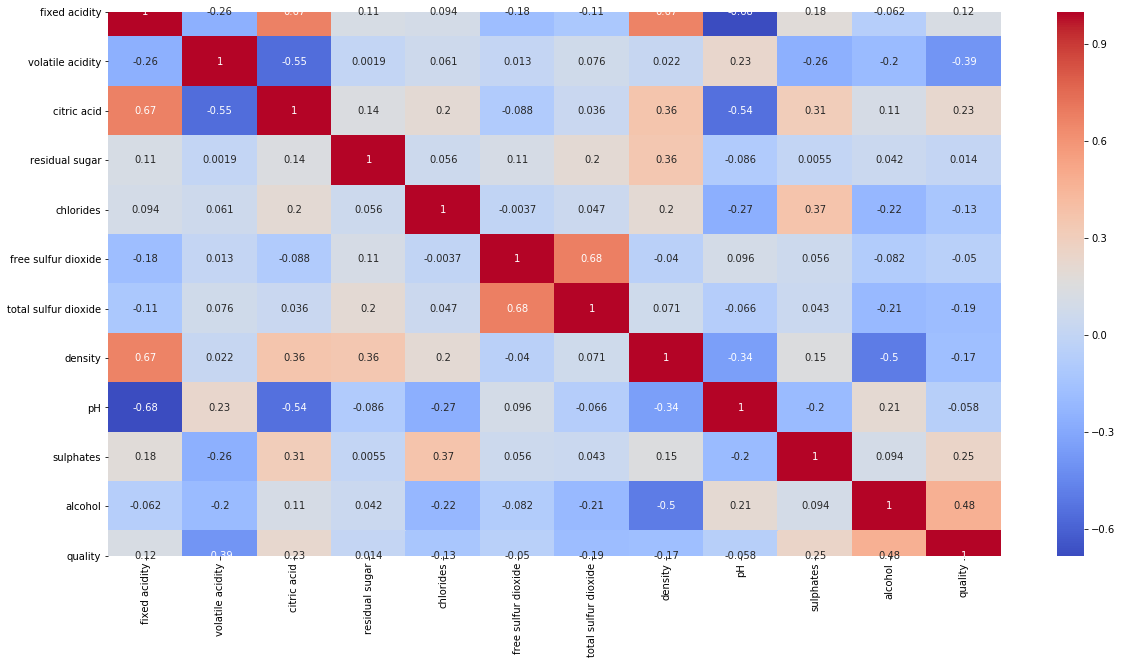

In [33]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

###### SPLIT DATA INTO X & y - DEPENDENT & INDEPENDENT VARIABLE

In [40]:
X = df.drop(columns=['quality'])
y = df['quality']

###### CLASS IMBALACEMENT

In [38]:
!pip install imblearn

In [41]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors = 4)
# Transform the Dataset
X, y = oversample.fit_resample(X, y)

In [43]:
y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

###### MULTIPLE MODEL TRAINING

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

In [45]:
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 422)
    
    # TRAIN MODEL
    model.fit(x_train, y_train)
    print('ACCURACY', model.score(x_test, y_test) * 100)
    
    # CROSS VALIDATION
    score = cross_val_score(model, X, y, cv = 5)
    print('CV Score', np.mean(score) * 100)

###### LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

ACCURACY 46.86888454011742
CV Score 46.20697704345016


###### DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

ACCURACY 79.74559686888453
CV Score 72.46710339275721


###### RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

ACCURACY 85.71428571428571
CV Score 81.22806019996828


###### EXTRA TREE CLASSIFIER

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

ACCURACY 86.88845401174167
CV Score 82.01120444826174


###### XGBOOST

In [51]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, X, y)

[23:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY 85.42074363992172
[23:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:44] WARNING: C:/Users/Administrat

###### LIGHT GBM

In [52]:
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model, X, y)

ACCURACY 86.79060665362034
CV Score 80.98368112810599
